<a href="https://colab.research.google.com/github/ov-nastia/Machine_learning_Ovchinnik/blob/main/lab_08_10_Ovchiink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Створити автокодувальник для датасету рукописних цифр за допомогою бібліотеки Keras (використовуємо тільки звичайні шари).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, models
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Побудувати автокодувальник без шуму.
графік функції втрат
результати розпізнавання.

In [10]:

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [11]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [12]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [13]:
input_layer = layers.Input(shape=(784,))

In [14]:

encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [15]:
# Навчання моделі
history = autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Відновлені зображення
decoded_images = autoencoder.predict(x_test)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.3386 - val_loss: 0.1646
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1553 - val_loss: 0.1340
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1319 - val_loss: 0.1213
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.1214 - val_loss: 0.1158
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1158 - val_loss: 0.1111
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1118 - val_loss: 0.1074
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1079 - val_loss: 0.1051
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1054 - val_loss: 0.1025
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1032 - val_loss: 0.1009
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1014 - val_loss: 0.0992
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.1001 - val_loss: 0.0979
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
decoded_images = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


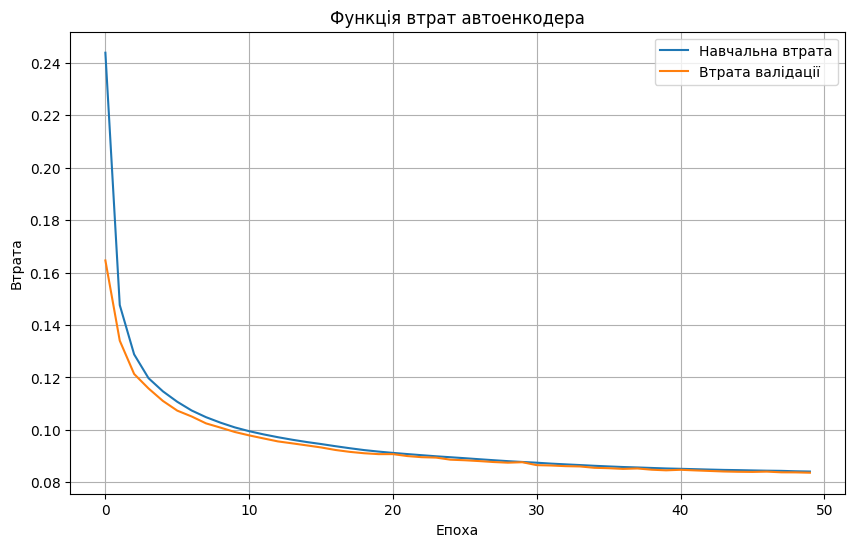

In [17]:
# Візуалізація функції втрат
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Навчальна втрата')
plt.plot(history.history['val_loss'], label='Втрата валідації')
plt.title('Функція втрат автоенкодера')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.grid()
plt.show()

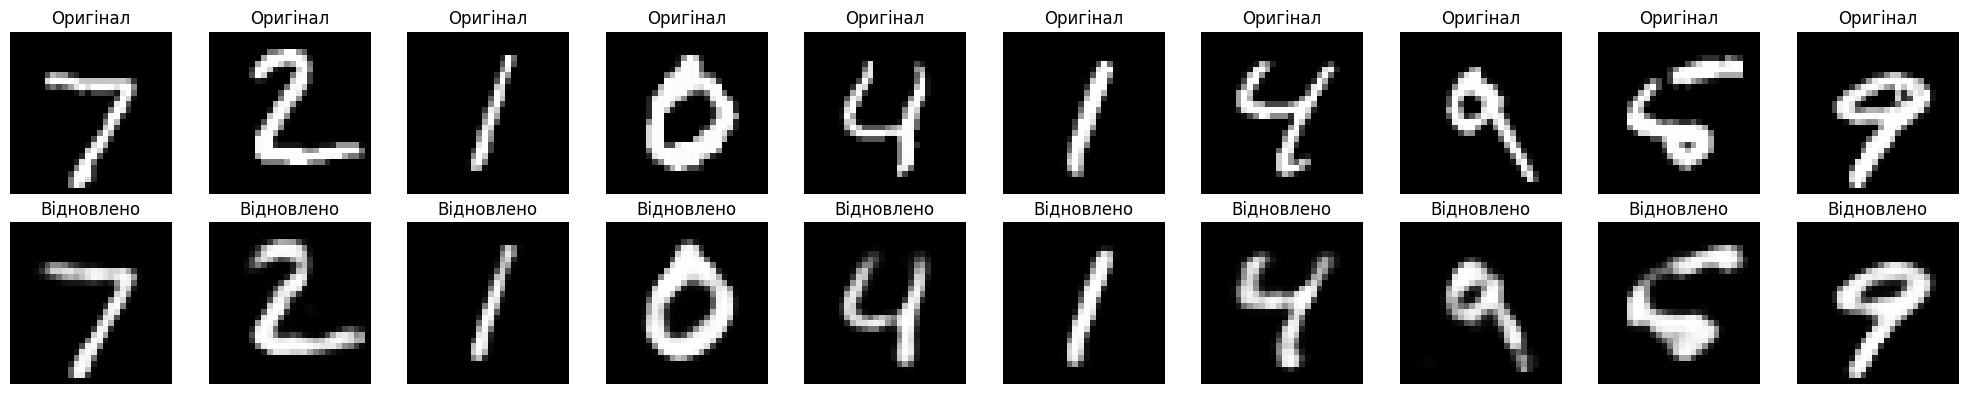

In [18]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    # Відображення оригінального зображення
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Оригінал")
    plt.axis('off')

    # Відображення відновленого зображення
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Відновлено")
    plt.axis('off')

plt.tight_layout()
plt.show()

Побудувати автокодувальник із шумом
графік функції втрат
результати розпізнавання.

In [19]:
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

In [20]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [21]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [22]:
input_layer = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = autoencoder.fit(
    x_train_noisy,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.3347 - val_loss: 0.2029
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.1910 - val_loss: 0.1657
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1637 - val_loss: 0.1553
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1545 - val_loss: 0.1490
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1481 - val_loss: 0.1435
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.1426 - val_loss: 0.1388
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1386 - val_loss: 0.1354
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1353 - val_loss: 0.1342
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1341 - val_loss: 0.1338
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1321 - val_loss: 0.1314
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1307 - val_loss: 0.1300
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

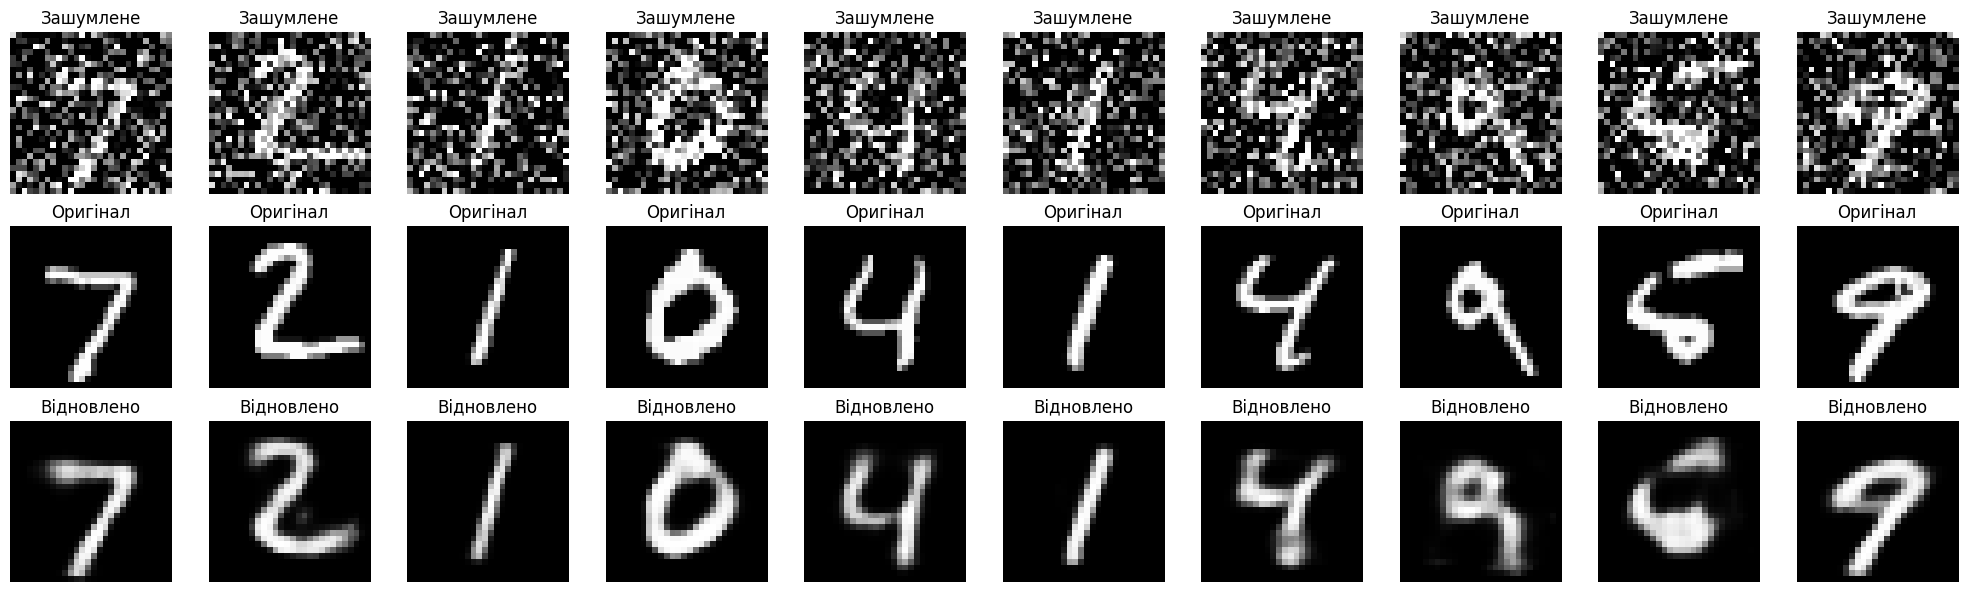

In [23]:
num_images = 10
plt.figure(figsize=(20, 6))

for i in range(num_images):
    plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title(f"Зашумлене")
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Оригінал")
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + 2*num_images)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.title(f"Відновлено")
    plt.axis('off')

plt.tight_layout()
plt.show()

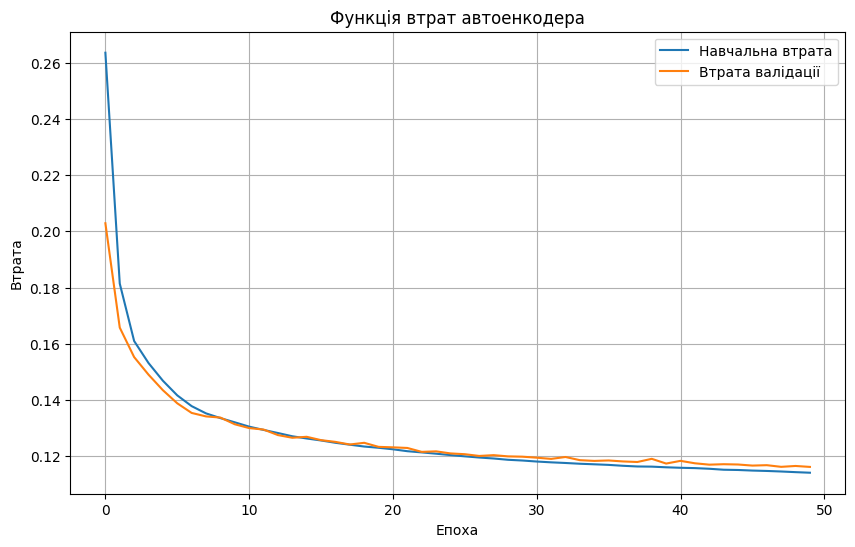

In [24]:

# Візуалізація функції втрат
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Навчальна втрата')
plt.plot(history.history['val_loss'], label='Втрата валідації')
plt.title('Функція втрат автоенкодера')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.grid()
plt.show()


Розподіл векторів прихованого шару

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


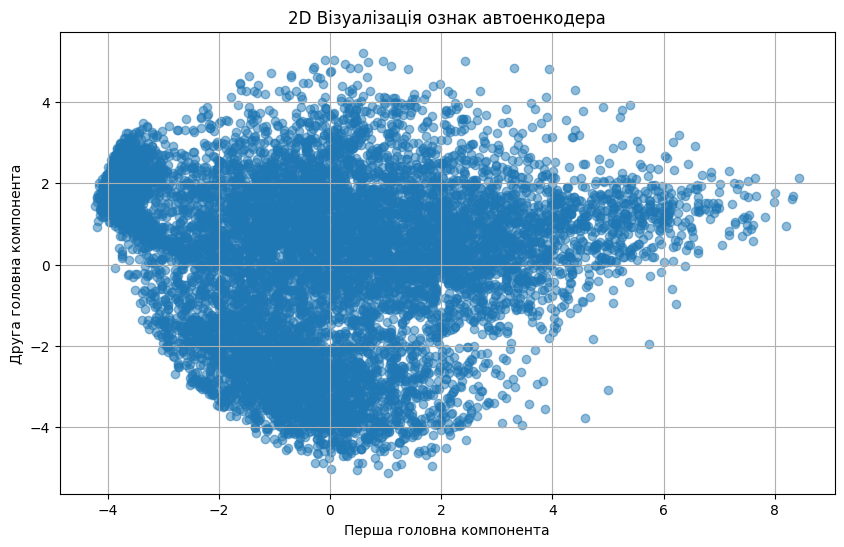

In [25]:
h = autoencoder.predict(x_test)


pca = PCA(n_components=2)
h_reduced = pca.fit_transform(h)

plt.figure(figsize=(10, 6))
plt.scatter(h_reduced[:, 0], h_reduced[:, 1], alpha=0.5)
plt.title('2D Візуалізація ознак автоенкодера')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.grid()
plt.show()